# **BASIC FUNCTIONS (Ex01)**

In [1]:
import osfclient
import mne
import mne_bids
import numpy as np
import ccs_eeg_utils
# Load the data
from mne_bids import (BIDSPath,read_raw_bids)

# path where to save the datasets.
bids_root = "../local/bids"
subject_id = '002' # recommend subject 2 for now


bids_path = BIDSPath(subject=subject_id,task="P3",session="P3",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)

# read the file
raw = read_raw_bids(bids_path)
# fix the annotations readin
ccs_eeg_utils.read_annotations_core(bids_path,raw)

raw.load_data()

Reading ..\local\bids\sub-002\ses-P3\eeg\sub-002_task-P3_eeg.fdt
Reading 0 ... 414719  =      0.000 ...   404.999 secs...


<ipython-input-1-432e7ae70024>:19: RuntimeWarning: Expected to find a single events file associated with sub-002_ses-P3_task-P3, but found 2: "['..\\local\\bids\\sub-002\\eeg\\sub-002_ses-P3_task-P3_events.tsv', '..\\local\\bids\\sub-002\\ses-P3\\eeg\\sub-002_ses-P3_task-P3_events.tsv']".

The search_str was "..\local\bids\sub-002\**\sub-002_ses-P3*events.tsv"
  raw = read_raw_bids(bids_path)
<ipython-input-1-432e7ae70024>:19: RuntimeWarning: Expected to find a single channels file associated with sub-002_ses-P3_task-P3, but found 2: "['..\\local\\bids\\sub-002\\eeg\\sub-002_ses-P3_task-P3_channels.tsv', '..\\local\\bids\\sub-002\\ses-P3\\eeg\\sub-002_ses-P3_task-P3_channels.tsv']".

The search_str was "..\local\bids\sub-002\**\sub-002_ses-P3*channels.tsv"
  raw = read_raw_bids(bids_path)
<ipython-input-1-432e7ae70024>:19: RuntimeWarning: Did not find any coordsystem.json associated with sub-002_ses-P3_task-P3.

The search_str was "..\local\bids\sub-002\**\sub-002_ses-P3*coordsystem.js

<RawEEGLAB | sub-002_task-P3_eeg.fdt, 33 x 414720 (405.0 s), ~104.4 MB, data loaded>

In [2]:
# this line is for opening the plots in a seperate window
%matplotlib qt

Effective window size : 2.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-3-6eecd386d0b2>:8: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(area_mode='range', tmax=10.0, average=False,xscale="linear")


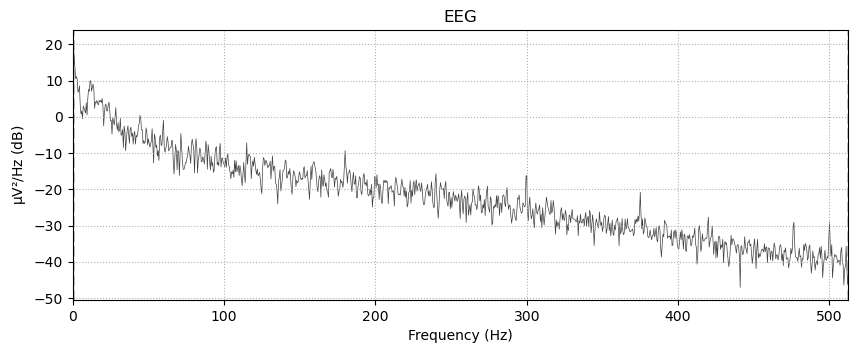

Channels marked as bad: none


In [3]:
# plot all channels (press a in that window)
raw.plot(n_channels=len(raw.ch_names))#,scalings =40e-6)

# cut the raw data to one channel and changes raw! (Cz is channel name)
raw.pick_channels(["Cz"])
# if no change of raw is wanted use this 
# raw_subselect = raw.copy().pick_channels(["Cz"])
raw.plot_psd(area_mode='range', tmax=10.0, average=False,xscale="linear")

Used Annotations descriptions: ['response:201', 'response:202', 'stimulus:11', 'stimulus:12', 'stimulus:13', 'stimulus:14', 'stimulus:15', 'stimulus:21', 'stimulus:22', 'stimulus:23', 'stimulus:24', 'stimulus:25', 'stimulus:31', 'stimulus:32', 'stimulus:33', 'stimulus:34', 'stimulus:35', 'stimulus:41', 'stimulus:42', 'stimulus:43', 'stimulus:44', 'stimulus:45', 'stimulus:51', 'stimulus:52', 'stimulus:53', 'stimulus:54', 'stimulus:55']
Not setting metadata
Not setting metadata
200 matching events found
Setting baseline interval to [-0.099609375, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 200 events and 1127 original time points ...
0 bad epochs dropped
Need more than one channel to make topography for eeg. Disabling interactivity.


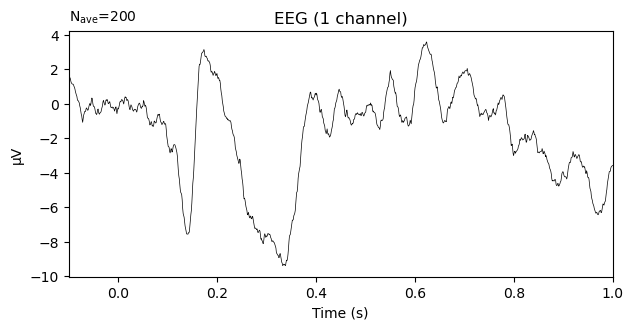

In [4]:
# convert annotations to events, events_dict = {'response': 1, 'stimulus': 2}
evts,evts_dict = mne.events_from_annotations(raw)


# get all keys which contain "stimulus"
wanted_keys = [e for e in evts_dict.keys() if "stimulus" in e]
# subset the large event-dictionairy
evts_dict_stim=dict((k, evts_dict[k]) for k in wanted_keys if k in evts_dict)



# Epoch the data (splitting data to equal-duration time intervals)
epochs = mne.Epochs(raw,evts,evts_dict_stim,tmin=-0.1,tmax=1)

data = epochs.get_data()


# plotting single epochs (more interessting for multiple channels)
# epochs.plot(n_epochs=5, butterfly=True)


epochs.average().plot()

In [5]:
target = ["stimulus:{}{}".format(k,k) for k in [1,2,3,4,5]]
distractor = ["stimulus:{}{}".format(k,j) for k in [1,2,3,4,5] for j in [1,2,3,4,5] if k!=j]

target_evok = epochs[["stimulus:{}{}".format(k,k) for k in [1,2,3,4,5]]].average()
distractor_evok = epochs[["stimulus:{}{}".format(k,j) for k in [1,2,3,4,5] for j in [1,2,3,4,5] if k!=j]].average()

mne.viz.plot_compare_evokeds([target_evok,distractor_evok])

<ipython-input-5-ba8f6a6ad624>:7: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds([target_evok,distractor_evok])


[<Figure size 800x600 with 1 Axes>]

# FILTERING (Ex02)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 6759 samples (6.601 sec)

Effective window size : 2.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-6-020150af80d4>:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered_raw.plot_psd(area_mode='range', tmax=10.0, average=False,xscale="log")


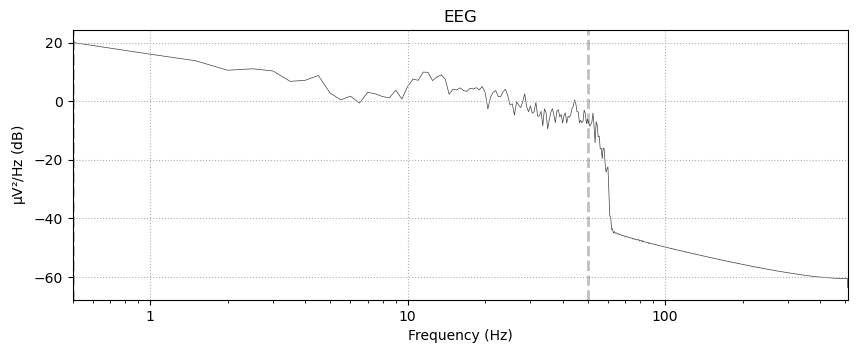

In [6]:
# using mne filters for the eeg signal
filtered_raw = raw.copy().filter(0.5,50, fir_design='firwin')
filtered_raw.plot_psd(area_mode='range', tmax=10.0, average=False,xscale="log")

# INTERPOLATION/CLEANING (Ex03)

In [ ]:
# press a and mark bad channels by hand (holding right click)
raw.plot(n_channels=len(raw.ch_names))

In [ ]:
# save and load bad channels
bad_ix = [i for i,a in enumerate(raw.annotations) if a['description']=="BAD_"]
raw.annotations[bad_ix].save("sub-{}_task-P3_badannotations.csv".format(subject_id))

annotations = mne.read_annotations("sub-002_task-P3_badannotations.csv".format(subject_id))
raw.annotations.append(annotations.onset,annotations.duration,annotations.description)

In [11]:
#I remove one at random. (In case there is a bad channel, picke this channel here!)
raw.info['bads'] = ['FP2']

# for interpolation:

# tell compiler that these are no eeg channels
raw.set_channel_types({'HEOG_left':'eog'})
raw.set_channel_types({'HEOG_right':'eog'})
raw.set_channel_types({'VEOG_lower':'eog'})

# You need channel locations to run the interpolation 
# which you can get by using the default-standardized channel locations
raw.set_montage('standard_1020',match_case=False)
raw.interpolate_bads()

In [ ]:
# REJECTION CRITERION FOR PEAK TO PEAK

%matplotlib inline
import mne
evts,evts_dict = mne.events_from_annotations(raw)
wanted_keys = [e for e in evts_dict.keys() if "stimulus" in e]
evts_dict_stim=dict((k, evts_dict[k]) for k in wanted_keys if k in evts_dict)

# get epochs with and without rejection
epochs        = mne.Epochs(raw,evts,evts_dict_stim,tmin=-0.1,tmax=1,reject_by_annotation=False)
epochs_manual = mne.Epochs(raw,evts,evts_dict_stim,tmin=-0.1,tmax=1,reject_by_annotation=True)


# THESE ARE THE MAIN LINES FOR REJECTION
reject_criteria = dict(eeg=100e-6,       # 100 µV # HAD TO INCREASE IT HERE, 100 was too harsh
                       eog=200e-6)       # 200 µV
epochs_thresh = mne.Epochs(raw,evts,evts_dict_stim,tmin=-0.1,tmax=1,reject=reject_criteria,reject_by_annotation=False)




#from matplotlib import pyplot as plt
# compare
#plt.plot([0,:])
mne.viz.plot_compare_evokeds({'raw':epochs.average(),'clean':epochs_manual.average(),'thresh':epochs_thresh.average()},picks="Cz")

In [ ]:
#AUTOREJECT CHANNELS

from autoreject import AutoReject
ar = AutoReject(verbose='tqdm')
epochs.load_data()
epochs_ar = ar.fit_transform(epochs)

In [ ]:
#PLOT REJECTED

r = ar.get_reject_log(epochs)
r.plot(orientation="horizontal")

In [ ]:
#COMPARE EVOKEDS 

mne.viz.plot_compare_evokeds({
    'raw':epochs.average(),
    'clean':epochs_manual.average(),
    'ar':epochs_ar.average()
    },picks="Cz")

# ICA (Ex04)

In [ ]:
ica = mne.preprocessing.ICA(method="fastica")
ica.fit(raw,verbose=True)

In [ ]:
ica.plot_components(range(10))

In [ ]:
icaact = ica.get_sources(raw)
plt.plot(icaact[5,0:20000][0].T)
#plt.plot(raw[0,0:20000][0].T)

In [ ]:
from importlib import reload  
reload(mne)
ica.plot_properties(raw,picks=[0,1],psd_args={'fmax': 35.},reject=None)
print(1)

In [ ]:
ica.plot_properties(raw)

In [ ]:
epochs = mne.Epochs(ica.get_sources(raw),evts,evts_dict_stim,tmin=-0.1,tmax=1)
epochs.average(picks=[3]).plot()

In [13]:
# COMPARE EEG BEFORE AND AFTER

reconst_raw = raw.copy()
#ica.apply(reconst_raw,exclude=[1,8,9])

#raw.plot()
#reconst_raw.plot()  
ica.plot_overlay(raw,exclude=[1,8,9])

NameError: name 'ica' is not defined

In [ ]:
#NOT SURE WHAT THIS IS
whiteX = whiten(x)

w = np.eye(x.shape[0])

I = np.eye(x.shape[0])
f = lambda x: (2 / (1 + np.exp(-x))) 
lr = 0.01
bias1 = np.zeros((x.shape[0], 1)) 
w2 = 0
for k in range(0,50000): 
    u = np.matmul(w,whiteX)
    #A = np.matmul(f(u),u.T)
    #A = np.dot(f(u),u.T)
    #dW = lr * np.dot(( I - A ),w)



    unmixed = np.dot(w, whiteX) + bias1
    logit = 1 - (2 / (1 + np.exp(-unmixed)))
    w = w + lr * np.dot(I + np.dot(logit, unmixed.T), w)
    bias1 = bias1 + lr * logit.sum(axis=1).reshape(bias1.shape)

    if np.mod(k,5000)==0:
        print(A)

    if np.max(np.abs(w))>100:
        print("reducing learningrate \n")
        lr = lr*0.2
        # reset w
        w = np.eye(x.shape[0]) 
        continue
    w = w+ dW

    #u2 = w2*x;
    #w2 = w2+0.0001*(I+ (1- 2*f2(u2))*u2)*w2

# Statistical Analysis of N170 (Ex06)

In [ ]:
#read csv to pandas frame 

import pandas as pd
import seaborn as sns
import numpy as np
d = pd.read_csv("ex6_N170.csv",delimiter=",")

In [ ]:
#plot-matrix
sns.pairplot(d,hue="cond")

## Linear Regression

In [ ]:
# We have to generate a DesignMatrix in order to fit our model. 
# The simplest designmatrix consists only of "1", one for each data-point.
def solve(*args):
    #generates a Matrix with lengt=len(PO8.values) and consists of only 1's
    X = np.stack(args).T
    #print(X)
    return np.linalg.inv(X.T @ X)@X.T@d.PO8.values

In [ ]:
const = np.ones(d.shape[0])
# solve(const) = np.mean(d.PO8)
print("Const-only{},mean:{}".format(solve(const),np.mean(d.PO8)))

In [ ]:
from matplotlib import pyplot as plt
# histogram plot
plt.hist(d.PO8)

In [ ]:
# encodes scrumbled as 0  and intact as 1
cond = 1.*(d.cond.values == 'intact')

In [ ]:
# matrix for both conditions (PO8 ~ intercept + cond)
solve(const,cond)

In [ ]:
# encode faces as 1
stim = 1.*(d.stim.values == 'face')
print(solve(const,cond))
# intact, face
# beta values [b_const,b_cond,b_stim] for 'intact' and 'face'
print(solve(const,cond,stim))

In [ ]:
# Return Pearson product-moment correlation coefficients
np.corrcoef(cond,stim*cond)

# Now we have what we call a 2x2 design. 
# Two categorical factors (often only "factor") with two levels each + the interaction.
print(solve(const,cond,stim,cond*stim))

In [ ]:
est = solve(const,cond,stim,cond*stim)

# at the end there are the formulas for the 4 values: 
# one for intact faces, one for scrambled faces, one for intact cars and one for scrambled cars
res = pd.DataFrame({"stim":["car","car","face","face"],
              "cond":["scrambled","intact","scrambled","intact"],
              "est": [
                    1*est[0]+0*est[1] + 0*est[2] + 0*0*est[3],
                    1*est[0]+1*est[1] + 0*est[2] + 1*0*est[3],
                    1*est[0]+0*est[1] + 1*est[2] + 0*1*est[3],
                    1*est[0]+1*est[1] + 1*est[2] + 1*1*est[3]]})
sns.lineplot(x=res.cond,y=res.est,hue=res.stim)

In [ ]:
# baseline can be adjusted by this
cond-0.5

In [ ]:
# Dummy coding uses only ones and zeros to convey all of the necessary information on group membership
print(solve(const,cond,stim,cond*stim)) # dummy coding 

# Effect coding uses only ones, zeros and minus ones to convey all of the necessary information on group membership
print(solve(const,cond-0.5,stim-0.5,(cond-0.5)*(stim-0.5))) # effect coding

## Continuous Regressors

In [ ]:
# Plot the PO8 actiity against the baseline
sns.scatterplot(x=d.bsl,y=d.PO8,hue=d.cond)

In [ ]:
# now also the baseline is added to the predictor (we want to regress the baseline out)
print(solve(const,cond,stim,cond*stim,d.bsl))
print(solve(const,cond,stim,cond*stim))

# condition-indivudal baselines
print(solve(const,cond,stim,cond*stim,d.bsl,d.bsl*cond,d.bsl*stim,d.bsl*cond*stim))

In [ ]:
# estimation with baseline correction
est = solve(const,cond,stim,cond*stim,d.bsl,d.bsl*cond,d.bsl*stim,d.bsl*cond*stim)
est = solve(const,cond,stim,cond*stim,d.bsl)

res = pd.DataFrame({"stim":["car","car","face","face"],
              "cond":["scrambled","intact","scrambled","intact"],
              "est": [
                    1*est[0]+0*est[1] + 0*est[2] + 0*0*est[3],
                    1*est[0]+1*est[1] + 0*est[2] + 1*0*est[3],
                    1*est[0]+0*est[1] + 1*est[2] + 0*1*est[3],
                    1*est[0]+1*est[1] + 1*est[2] + 1*1*est[3]]})
sns.lineplot(x=res.cond,y=res.est,hue=res.stim)

# estimation like before
est = solve(const,cond,stim,cond*stim)
res = pd.DataFrame({"stim":["car","car","face","face"],
              "cond":["scrambled","intact","scrambled","intact"],
              "est": [
                    1*est[0]+0*est[1] + 0*est[2] + 0*0*est[3],
                    1*est[0]+1*est[1] + 0*est[2] + 1*0*est[3],
                    1*est[0]+0*est[1] + 1*est[2] + 0*1*est[3],
                    1*est[0]+1*est[1] + 1*est[2] + 1*1*est[3]]})
sns.lineplot(x=res.cond,y=res.est,hue=res.stim)

## Uncertainty & Standard Errors

In [ ]:
import numpy as  np

# standard error of the betas
def se(*args):
    X = np.stack(args).T
    b = np.linalg.inv(X.T @ X)@X.T@d.PO8
    e = d.PO8-X@b
    s = np.var(e)
    return np.sqrt(np.diag(s * np.linalg.inv(X.T @ X)))

se = (se(const,cond,stim,cond*stim))    
es = (solve(const,cond,stim,cond*stim))    
print(es)
print(se)

print(es/se)

In [ ]:
# including our contrast vectors e.g. c = [1 0 0 00], or c=[1 0 1 10]
def se_contrast(*args,c=[1,0,0,0]):
    c = np.array(c)
    X = np.stack(args).T
    b = np.linalg.inv(X.T @ X)@X.T@d.PO8
    e = d.PO8-X@b
    s = np.var(e)
    #print(np.sqrt(c.T @ np.linalg.inv(X.T @ X) @c))
    return np.sqrt(s * c.T @ np.linalg.inv(X.T @ X) @c)

se_A = se_contrast(const,cond,stim,cond*stim,c = [1,1,0,0])
res

In [ ]:
from matplotlib import pyplot as plt
est = solve(const,cond,stim,cond*stim)
res = pd.DataFrame({"stim":["car","car","face","face"],
              "cond":["scrambled","intact","scrambled","intact"],
              "est": [
                    est@np.array([1,0 ,0,0*0]),
                    est@np.array([1,1 ,0,1*0]),
                    est@np.array([1,0 ,1,0*1]),
                    est@np.array([1,1 ,1,1*1])],
               "se": [se_contrast(const,cond,stim,cond*stim,c = [1,0,0,0]),
                     se_contrast(const,cond,stim,cond*stim,c = [1,1,0,0]),
                     se_contrast(const,cond,stim,cond*stim,c = [1,0,1,0]),
                     se_contrast(const,cond,stim,cond*stim,c = [1,1,1,1])]})
sns.lineplot(x=res.cond,y=res.est,hue=res.stim)
# plot uncertainties as errorbars
plt.errorbar(x=res.cond,y=res.est,yerr=res.se,fmt="none",c = 'k')

# Separate Analysis

In [ ]:
read_path = path + "/sub-" + sub + temp_path + "sub-" + sub +"_cleaned.fif"
raw = mne.io.read_raw_fif(read_path)

In [ ]:
eeg_crit = 100e-6
epochs = peak_to_peak(raw, eeg_crit)

In [ ]:
# Drop the bad epochs from the preveous step
epochs.drop_bad()
# epochs.plot_drop_log()

In [ ]:
target_normal = epochs[["stimulus:{}".format(k) for k in range(1,41)]].average()
distractor_normal = epochs[["stimulus:{}".format(k) for k in range(41,81)]].average()
mne.viz.plot_compare_evokeds([target_normal,distractor_normal], title = 'normal faces / normal cars')

In [ ]:
target_scrambled = epochs[["stimulus:{}".format(k) for k in range(101,141)]].average()
distractor_scrambled = epochs[["stimulus:{}".format(k) for k in range(141,181)]].average()
mne.viz.plot_compare_evokeds([target_scrambled,distractor_scrambled], title = 'scrambled faces / scrambled cars')

In [ ]:
all_faces = [k for k in range(1,41)]
all_faces.extend([k for k in range(101,141)])
all_cars = [k for k in range(41,81)]
all_cars.extend([k for k in range(141,181)])

In [ ]:
target_all = epochs[["stimulus:{}".format(k) for k in all_faces]].average()
distractor_all = epochs[["stimulus:{}".format(k) for k in all_cars]].average()

mne.viz.plot_compare_evokeds([target_all,distractor_all], title = 'all faces / all cars')

In [ ]:
epochs.plot(n_epochs=5, butterfly=False)

In [ ]:
epochs.average().plot()

In [ ]:
%matplotlib inline
# "If times=“peaks”, finds time points automatically by checking for local maxima in global field power."
times = np.arange(0.130, 0.200, 0.05)

print('target all')
target_all.plot_topomap(times=times)
print('distractors all')
distractor_all.plot_topomap(times=times)

print('target normal')
target_normal.plot_topomap(times=times)
print('distractors normal')
distractor_normal.plot_topomap(times=times)

print('target scrambled')
target_scrambled.plot_topomap(times=times)
print('distractors scrambled')
distractor_scrambled.plot_topomap(times=times)

In [ ]:
ep = epochs.copy()
ep.load_data()
ep.pick_channels(['P7'])
mne.viz.plot_epochs_image(ep)

In [ ]:
%matplotlib qt
face_normal = ep[["stimulus:{}".format(k) for k in range(1,41)]].average()
car_normal = ep[["stimulus:{}".format(k) for k in range(41,81)]].average()
face_scrambled = ep[["stimulus:{}".format(k) for k in range(101,141)]].average()
car_scrambled = ep[["stimulus:{}".format(k) for k in range(141,181)]].average()
mne.viz.plot_compare_evokeds([face_normal,car_normal,face_scrambled,car_scrambled], title = 'normal faces / normal cars')

# T-Test

In [ ]:
#print(np.var(face_intact_peaks), np.var(car_intact_peaks))
# equal_var = True => standard independent 2 sample t-test (equal population variances)
# equal_var = True => Welch’s t-test
stats.ttest_ind(a=face_intact_peaks, b=car_intact_peaks, equal_var=True)